Random mean:
[[0.12793899 0.36180566]
 [0.44623909 0.50561273]
 [0.28993871 0.10268249]]
-------------------------------------------------------------------
final mean :
[[0.13799308 0.26387132]
 [0.67531124 0.8594017 ]
 [0.83155175 0.19225431]]
----------------------
converges in iterations:3


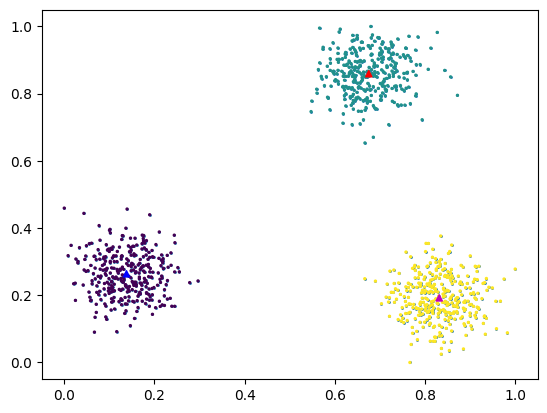

Random mean:
[[0.60687193 0.1734282 ]
 [0.99866331 0.33739778]
 [0.7371685  0.42899595]]
-------------------------------------------------------------------
final mean :
[[0.32140272 0.53498073]
 [0.68239517 0.37924357]
 [0.2448622  0.73592089]]
----------------------
converges in iterations:20


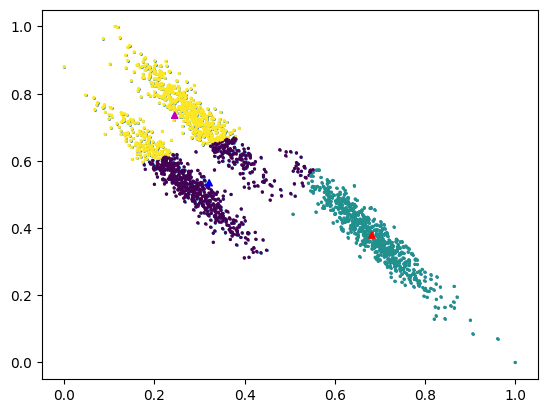

Random mean:
[[0.03763792 0.69889323]
 [0.19148165 0.29342845]
 [0.65166556 0.52154813]]
-------------------------------------------------------------------
final mean :
[[0.28448883 0.73818378]
 [0.59406194 0.16666045]
 [0.81101367 0.46129974]]
----------------------
converges in iterations:16


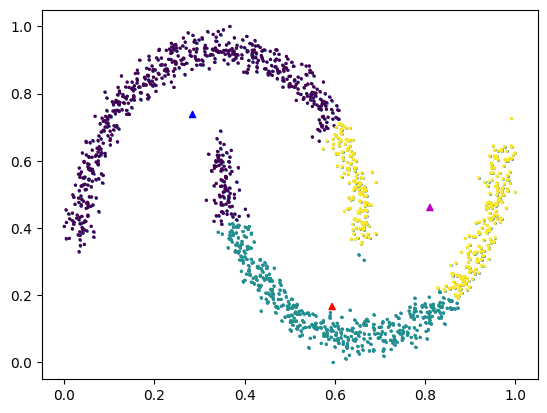

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from k_means import *
import math

# Mode:
1:epsilon neighborhood     
2:1/gam*dis^2     
3: e^(-gam*dis^2)

In [3]:
def makesimilaritymat(df,mode=1,eps=0.3,gam=50):
    import math
    n=len(df)
    
    W=np.zeros([n,n])
    for i in range(n):
        for j in range(i+1,n):
            ad=distance(df.values[i],df.values[j])
            if mode==2:
                el=gam/ad*ad
                W[i][j]=el
                W[j][i]=el
            if mode==1:
                if ad<eps:
                    W[i][j]=1
                    W[j][i]=1
            if mode==3:
                el=math.exp(-1*gam*ad*ad)
                W[i][j]=el
                W[j][i]=el
                
    return W
def makedegmatrix(W):
    return np.diag(np.sum(W,axis=1))
    
    

    
def makelaplasianandfindeigvec(df,k=2,mode=1,eps=0.3,gam=50,colc=20):
    W=makesimilaritymat(df,mode,eps,gam)
    D=makedegmatrix(W)
    
    
    
    
    L=D-W
    T=np.linalg.inv(np.sqrt(D))
    L=np.matmul(np.matmul(T,L),T)
    
    w,v = np.linalg.eigh(L)
    col=["red" if abs(w[i])<0.01 else "blue" for i in range(colc)]
    plt.scatter(range(colc),w[:colc],c=col,marker="o")
    plt.title("eigen values")
    plt.show()
    col=[f"x{i}" for i in range(1,k+1)]
    return pd.DataFrame(v[:,:k],columns=col)


def spectral(df,k,mode=1,eps=0.3,gam=50,colc=20):
    edf=makelaplasianandfindeigvec(df,k,mode,eps,gam,colc)
    print(edf.head())
    edf=scaleitright(edf)
    print("KMEANS on Eig vec")
    tl=k_means(edf,k,k)
    plt.scatter(df['x1'],df['x2'],c=tl,s=2)

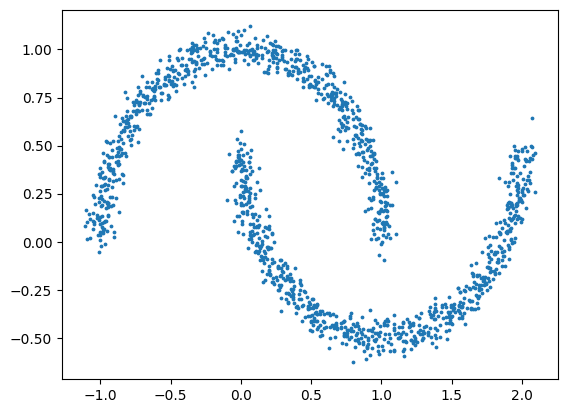

In [90]:
df=pd.read_csv("Assignment5Dataset.csv")
df.columns=['x1','x2']
plt.scatter(df['x1'],df['x2'],s=3)



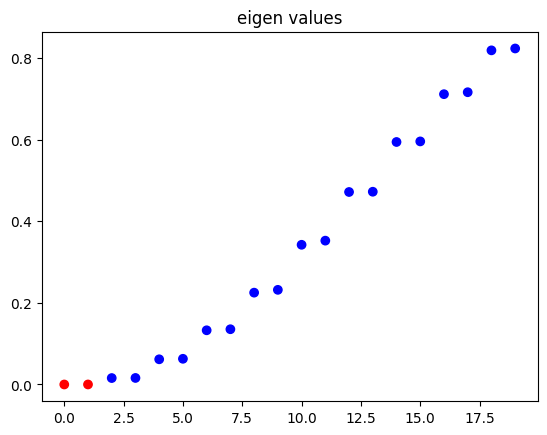

         x1        x2
0 -0.026984  0.026896
1 -0.026606  0.026565
2 -0.027171  0.027131
3 -0.020609  0.020600
4 -0.026984  0.026932
KMEANS on Eig vec
Random mean:
[[0.89711774 0.10416154]
 [0.52486017 0.53446459]]
-------------------------------------------------------------------
final mean :
[[0.12365844 0.0306361 ]
 [0.12053271 0.96878565]]
----------------------
converges in iterations:3


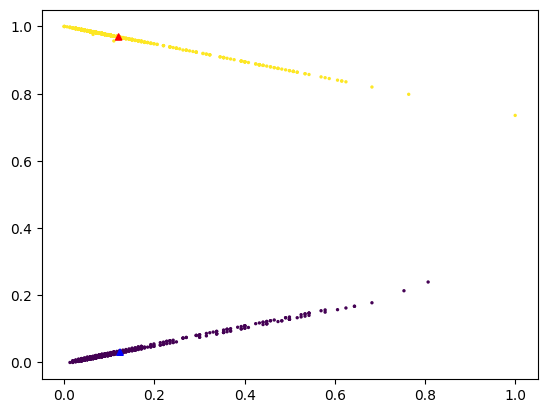

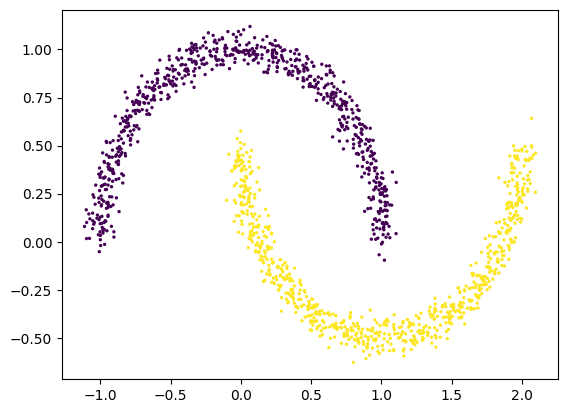

In [91]:
spectral(df,2,1,0.3)

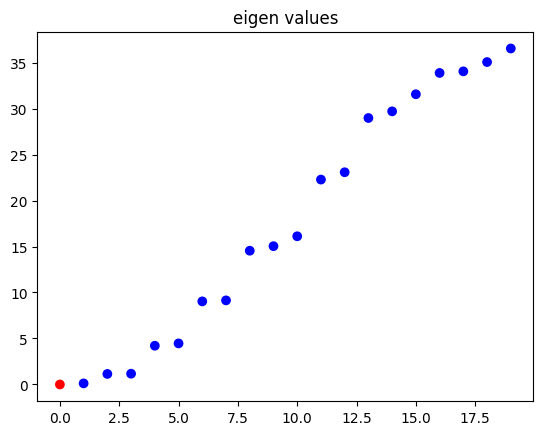

        x1        x2        x3        x4
0  0.02582 -0.024925  0.018224 -0.005269
1  0.02582 -0.027283 -0.028849  0.005021
2  0.02582 -0.027426 -0.030893  0.005379
3  0.02582 -0.021964  0.048997 -0.013887
4  0.02582 -0.026968 -0.023951  0.004117
KMEANS on Eig vec
Random mean:
[[0.18196587 0.1921527  0.44446336 0.66952018]
 [0.71870235 0.93883278 0.40232549 0.82832901]
 [0.84111291 0.89839772 0.8961048  0.01538834]
 [0.20110509 0.090593   0.19391141 0.70110568]]
-------------------------------------------------------------------
final mean :
[[0.2354609  0.08242394 0.83090444 0.4102739 ]
 [0.26231932 0.90254054 0.5879464  0.82489444]
 [0.25842319 0.97805266 0.44368696 0.19475983]
 [0.4494075  0.02325797 0.21183509 0.55594454]]
----------------------
converges in iterations:8


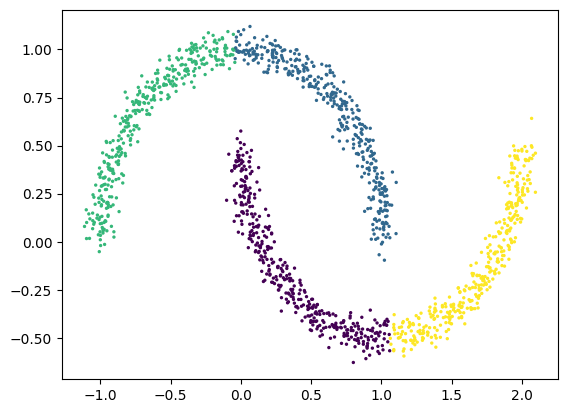

In [43]:
spectral(df,4,3,0.3,20)

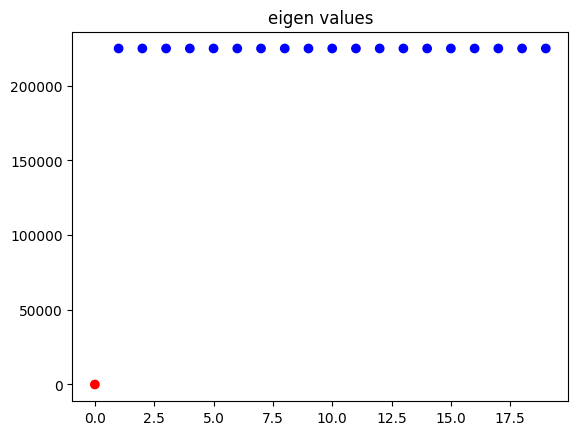

        x1        x2
0 -0.02582 -0.026444
1 -0.02582  0.976805
2 -0.02582  0.172312
3 -0.02582 -0.119772
4 -0.02582 -0.007233
KMEANS on Eig vec
Random mean:
[[0.77255052 0.39631686]
 [0.94739499 0.37211683]]
-------------------------------------------------------------------
final mean :
[[0.         1.        ]
 [0.97473242 0.10862916]]
----------------------
converges in iterations:1


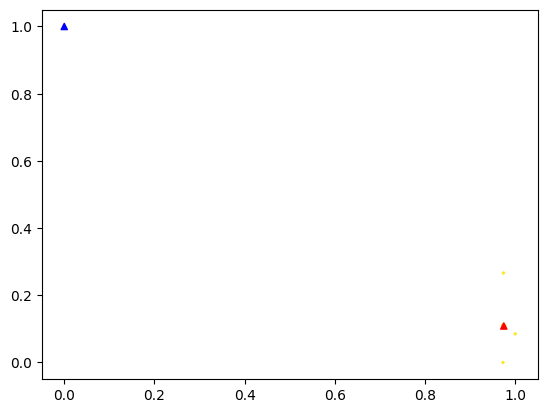

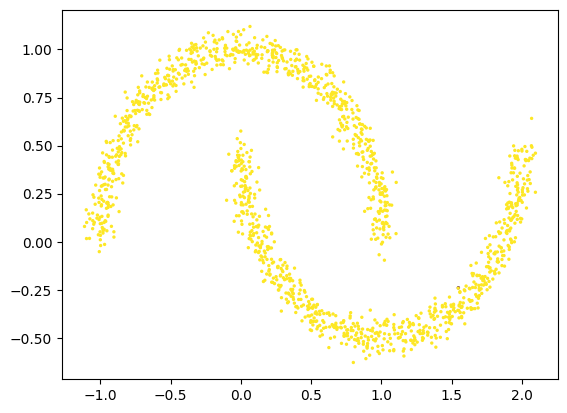

In [24]:
spectral(df,2,2,0.3,150)

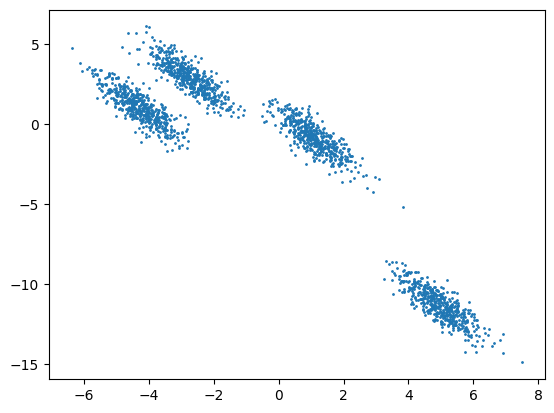

In [92]:

centers = 4
X, y = make_blobs(n_samples=2000, centers=centers,random_state=170)
t=[[0.60834,-0.63667],[-0.20887,0.85253]]

Xn=np.dot(X,t)
Xn=pd.DataFrame(Xn,columns=["x1","x2"])
plt.scatter(Xn['x1'],Xn['x2'],s=1)
Xn=scaleitright(Xn)
plt.show()

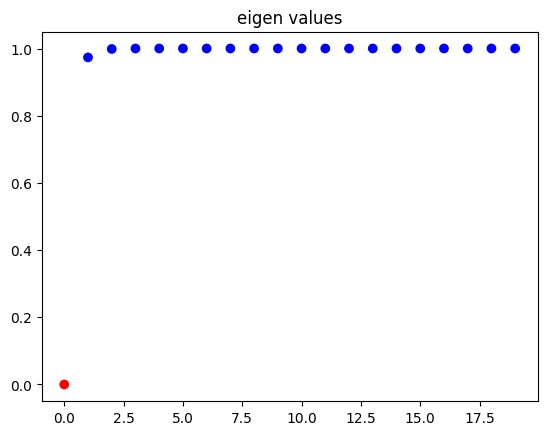

         x1        x2        x3        x4
0  0.022485 -0.005757 -0.034952  0.017874
1  0.022364  0.022585 -0.000281 -0.035238
2  0.022500 -0.002446 -0.028268  0.021220
3  0.022490  0.003784 -0.036056  0.002206
4  0.022496 -0.002830 -0.032099  0.017985
KMEANS on Eig vec
Random mean:
[[0.95782188 0.71993074 0.51009074 0.5414612 ]
 [0.8158101  0.90129024 0.72530112 0.79956324]
 [0.17196936 0.02807399 0.35774677 0.7851602 ]
 [0.51716401 0.97922073 0.82049462 0.95323162]]
-------------------------------------------------------------------
final mean :
Random mean:
[[0.31414219 0.82783318 0.60583006 0.52103013]
 [0.42757582 0.10865112 0.67118105 0.72660254]
 [0.1578513  0.44952374 0.72066179 0.36139199]
 [0.54571561 0.3500977  0.10568407 0.48131357]]
-------------------------------------------------------------------
final mean :
[[0.85366413 0.83396174 0.61971234 0.55403703]
 [0.58696438 0.21655324 0.619849   0.61851813]
 [0.40780514 0.13942317 0.64962675 0.43755292]
 [0.97670504 0.5978592 

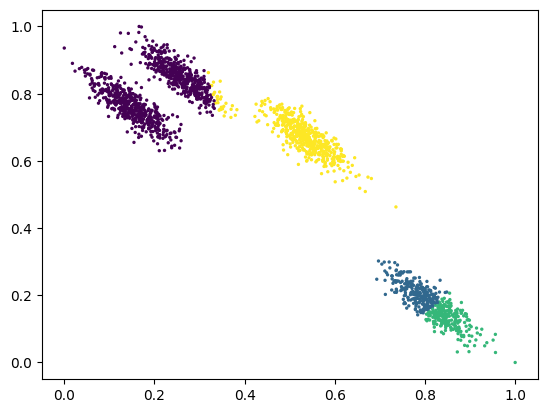

In [93]:
spectral(Xn,4,3,0.3,0.1)

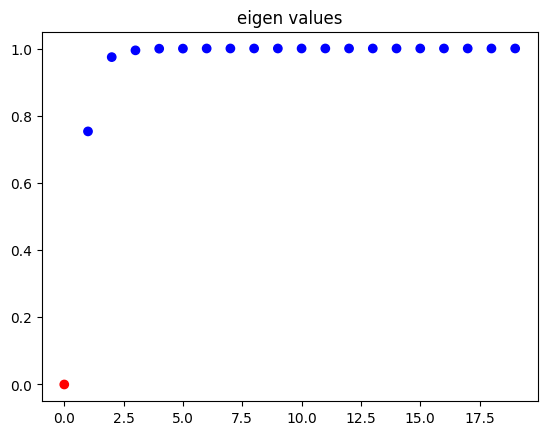

         x1        x2        x3        x4
0  0.023216 -0.005713 -0.038460  0.005978
1  0.022533  0.020453  0.014140 -0.032190
2  0.023382 -0.002229 -0.033823  0.009235
3  0.023350  0.004128 -0.033463 -0.012883
4  0.023337 -0.002624 -0.036027  0.005394
KMEANS on Eig vec
Random mean:
[[0.79394365 0.72583388 0.42826147 0.14292731]
 [0.93676882 0.57152913 0.38261109 0.33927961]
 [0.46002067 0.89257416 0.57249527 0.08083249]
 [0.2716559  0.33436953 0.7701878  0.45922222]]
-------------------------------------------------------------------
final mean :
[[0.89135365 0.87474195 0.48812813 0.36937933]
 [0.97221471 0.62806394 0.09107739 0.58098331]
 [0.86188745 0.8818228  0.71413834 0.70988589]
 [0.45095357 0.14939537 0.61415851 0.53192233]]
----------------------
converges in iterations:6


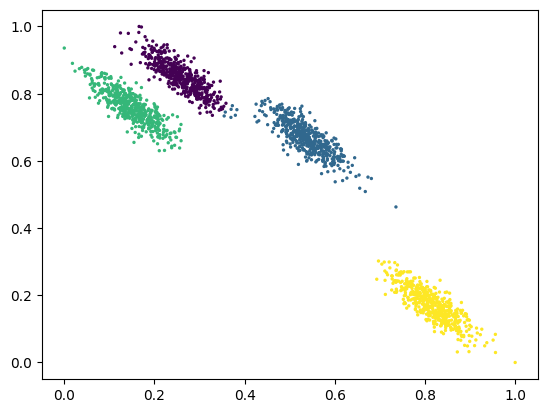

In [94]:
spectral(Xn,4,3,0.3,1)

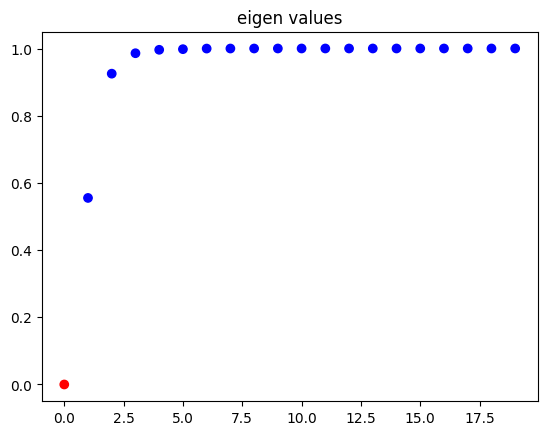

         x1        x2        x3        x4
0 -0.023397  0.005057  0.039384 -0.004580
1 -0.022862 -0.018218 -0.018848  0.028946
2 -0.023752  0.001466  0.035194 -0.005867
3 -0.023816 -0.004804  0.030786  0.018322
4 -0.023662  0.001865  0.036783 -0.002354
KMEANS on Eig vec
Random mean:
[[0.7196313  0.77273977 0.41570339 0.97257206]
 [0.47876466 0.0459158  0.43653559 0.40090541]
 [0.8468899  0.03107511 0.12984781 0.44654923]
 [0.29886996 0.5497233  0.67674297 0.59761465]]
-------------------------------------------------------------------
final mean :
Random mean:
[[0.57904923 0.94919051 0.52383728 0.39964006]
 [0.1455477  0.19793942 0.52714153 0.25881784]
 [0.53408    0.04760476 0.41474254 0.65585985]
 [0.36891373 0.54232714 0.59454306 0.65108418]]
-------------------------------------------------------------------
final mean :
[[0.60305652 0.88865818 0.38894093 0.48372585]
 [0.12608794 0.07210177 0.30065808 0.28252694]
 [0.08923564 0.07906521 0.45393992 0.67783501]
 [0.05052795 0.32518826

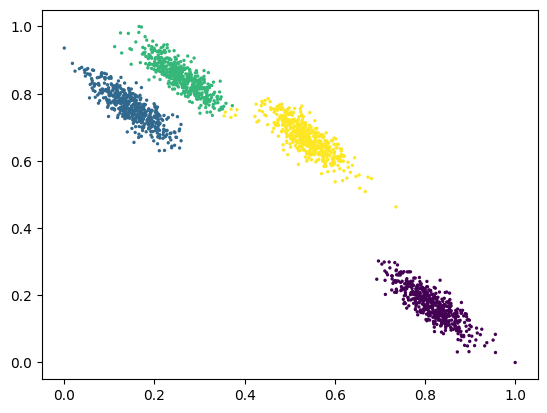

In [95]:
spectral(Xn,4,3,0.3,2)

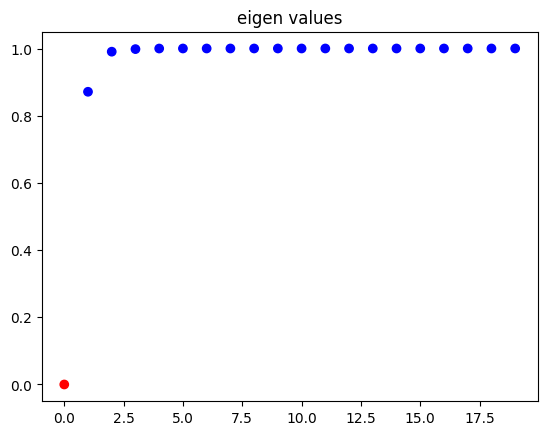

         x1        x2        x3        x4
0 -0.022892  0.005811 -0.037412  0.010699
1 -0.022413 -0.021645  0.007933 -0.034270
2 -0.022970  0.002414 -0.031897  0.014290
3 -0.022936 -0.003895 -0.035442 -0.006270
4 -0.022949  0.002805 -0.034855  0.010631
KMEANS on Eig vec
Random mean:
[[0.55053852 0.34165315 0.88497101 0.36834827]
 [0.19042807 0.93571848 0.47843514 0.80828186]
 [0.59954286 0.07747103 0.33139546 0.61287213]
 [0.99249208 0.11639811 0.07650093 0.79602881]]
-------------------------------------------------------------------
final mean :
Random mean:
[[0.05566979 0.53768879 0.57926154 0.28337621]
 [0.28415814 0.42708407 0.34377977 0.42618446]
 [0.34712934 0.99786258 0.67127292 0.23052336]
 [0.5345046  0.01951015 0.62940922 0.9249569 ]]
-------------------------------------------------------------------
final mean :
[[0.12231147 0.15097973 0.47412749 0.40349914]
 [0.02397903 0.39396005 0.12515397 0.63905528]
 [0.52136326 0.83365317 0.66131251 0.53953804]
 [0.14839198 0.14394624

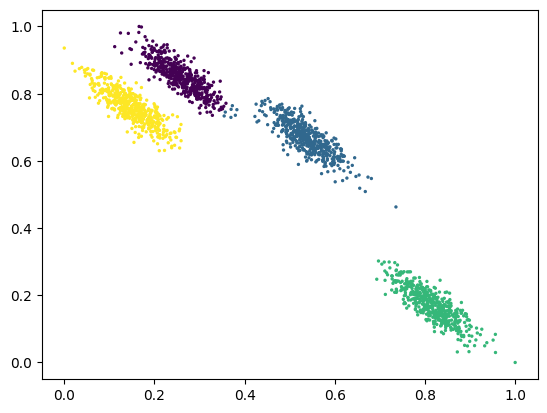

In [96]:
spectral(Xn,4,3,0.3,0.5)

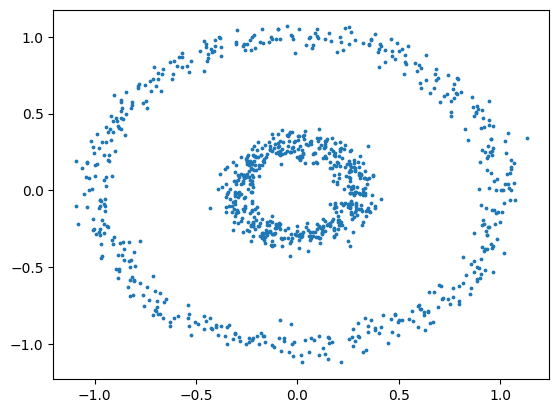

In [107]:

from sklearn.datasets import make_circles
from sklearn.neighbors import kneighbors_graph
import numpy as np

# create the data
X, labels = make_circles(n_samples=1000, noise=0.05, factor=.3)
df=pd.DataFrame(X,columns=["x1","x2"])
df.head(),df.shape
plt.scatter(df["x1"],df["x2"],s=3)

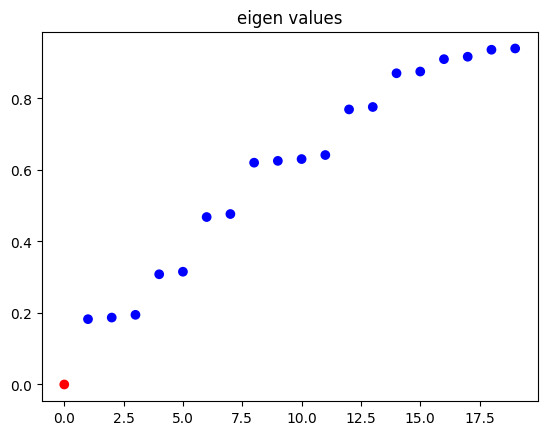

         x1        x2
0 -0.038745  0.001527
1 -0.039480  0.003757
2 -0.021919 -0.042021
3 -0.022004  0.037656
4 -0.021210 -0.049912
KMEANS on Eig vec
Random mean:
[[0.53345345 0.47668551]
 [0.2546497  0.29589332]]
-------------------------------------------------------------------
final mean :
[[0.87081142 0.50296045]
 [0.12534902 0.53048184]]
----------------------
converges in iterations:2


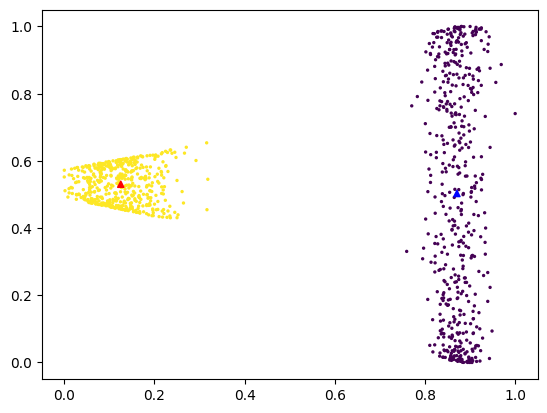

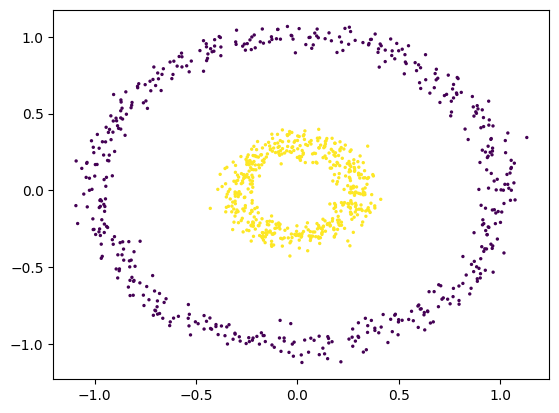

In [108]:
spectral(df,2,3,0.3,5)

In [29]:
def spiral_xy(i, spiral_num):
    """
    Create the data for a spiral.

    Arguments:
        i runs from 0 to 96
        spiral_num is 1 or -1
    """
    φ = i/16 * math.pi
    r = 6.5 * ((104 - i)/104)
    x = (r * math.cos(φ) * spiral_num)/13 + 0.5
    y = (r * math.sin(φ) * spiral_num)/13 + 0.5
    return x, y

def spiral(spiral_num):
    return [spiral_xy(i, spiral_num) for i in range(500)]
data= np.array(spiral(5))
data2=np.array(spiral(-5))
data=np.append(data,data2,axis=0)

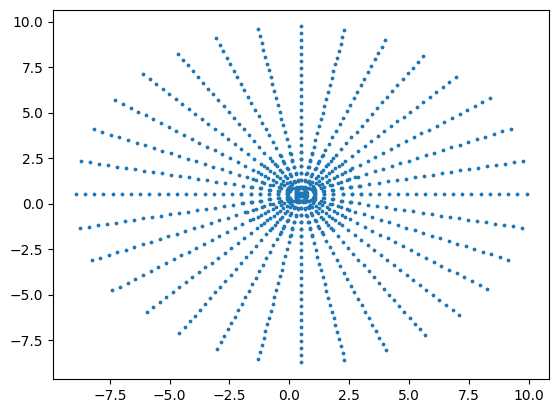

In [30]:
df=pd.DataFrame(data,columns=["x1","x2"])
df.head(),df.shape
plt.scatter(df["x1"],df["x2"],s=3)

In [ ]:
spectral(df,2,3,0.7,0.01)